In [49]:
from keras.models import Sequential, load_model
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam, RMSprop
from keras.losses import categorical_crossentropy
from keras.activations import relu, softmax
from keras.src.callbacks import History
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [37]:
DATASET_PATH: str = '/content/drive/MyDrive/datasets/17Flowers/' # train
INPUT_SHAPE: tuple[int, int, int] = (244, 244, 3)
EPOCHS: int = 40
MODEL_PATH_TO_SAVE: str = f'/content/drive/MyDrive/17_flowers_classification_{EPOCHS}ep.kears'

## Without Augmentation

In [ ]:
idg = ImageDataGenerator(validation_split=.1)

train_dataset = idg.flow_from_directory(
    DATASET_PATH + 'train',
    target_size=INPUT_SHAPE[:2],
    subset='training',
)

validation_dataset = idg.flow_from_directory(
    DATASET_PATH + 'train',
    target_size=INPUT_SHAPE[:2],
    subset='validation',
)

In [ ]:
model = Sequential([
    layers.Conv2D(32, 3, activation=relu, input_shape=INPUT_SHAPE , strides=2, padding='same'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation=relu , strides=2,  padding='same'),
    layers.MaxPooling2D(),


    layers.Flatten(),

    layers.Dropout(.2),
    layers.Dense(128, activation=relu),
    layers.Dense(17, activation=softmax),
])

In [ ]:
model.compile(
    optimizer=Adam(),
    loss=categorical_crossentropy,
    metrics=['accuracy']
)


history: History = model.fit(
    train_dataset, validation_data=validation_dataset,
    epochs=EPOCHS
)

## With Augmentation

In [38]:
from keras.applications import VGG16

vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=INPUT_SHAPE)
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False

In [39]:
model = Sequential([
    vgg_conv,
    layers.Flatten(),
    layers.Dense(1024, activation=relu),
    layers.Dropout(0.5),
    layers.Dense(17, activation=softmax)
])

In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_4 (Dense)             (None, 1024)              25691136  
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                                 
 dense_5 (Dense)             (None, 17)                17425     
                                                                 
Total params: 40423249 (154.20 MB)
Trainable params: 32787985 (125.08 MB)
Non-trainable params: 7635264 (29.13 MB)
_________________________________________________________________


In [41]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [42]:
train_generator = train_datagen.flow_from_directory(
        DATASET_PATH + 'train',
        target_size=INPUT_SHAPE[:2],
        batch_size=100,
        class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
        DATASET_PATH + 'train',
        target_size=INPUT_SHAPE[:2],
        batch_size=10,
        class_mode='categorical',
        shuffle=False
)

Found 1020 images belonging to 17 classes.
Found 340 images belonging to 17 classes.


In [43]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(learning_rate=2e-4),
    metrics=['accuracy']
)

In [44]:
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator,
)

Epoch 1/40
11/11 [==============================] - 27s 2s/step - loss: 3.1142 - accuracy: 0.0912 - val_loss: 2.5944 - val_accuracy: 0.1206
Epoch 2/40
11/11 [==============================] - 29s 3s/step - loss: 2.5787 - accuracy: 0.1480 - val_loss: 2.2803 - val_accuracy: 0.2559
Epoch 3/40
11/11 [==============================] - 26s 2s/step - loss: 2.2422 - accuracy: 0.2471 - val_loss: 2.2567 - val_accuracy: 0.2059
Epoch 4/40
11/11 [==============================] - 25s 2s/step - loss: 2.3102 - accuracy: 0.2657 - val_loss: 1.7607 - val_accuracy: 0.4500
Epoch 5/40
11/11 [==============================] - 27s 2s/step - loss: 1.8758 - accuracy: 0.3667 - val_loss: 1.5899 - val_accuracy: 0.4824
Epoch 6/40
11/11 [==============================] - 28s 3s/step - loss: 1.6969 - accuracy: 0.4441 - val_loss: 1.1551 - val_accuracy: 0.6676
Epoch 7/40
11/11 [==============================] - 30s 3s/step - loss: 1.5119 - accuracy: 0.5333 - val_loss: 1.3334 - val_accuracy: 0.5824
Epoch 8/40
11/11 [==

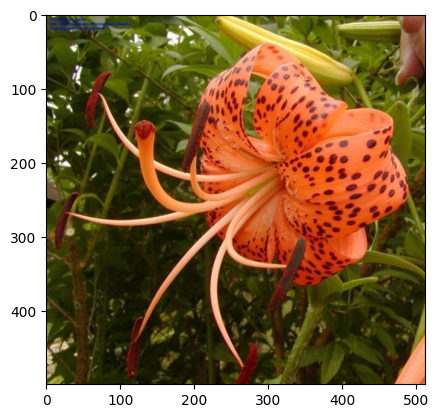

In [45]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

test_img = cv.imread('/content/drive/MyDrive/datasets/17Flowers/test/tigerlily/image_0493.jpg')
plt.imshow(cv.cvtColor(test_img, cv.COLOR_BGR2RGB))

In [46]:
flowers = ['bluebell', 'buttercup', 'coltsfoot', 'cowslip', 'crocus', 'daffodil', 'daisy', 'dandelion',
          'fritillary', 'iris', 'lilyvalley', 'pansy', 'snowdrop', 'sunflower', 'tigerlily', 'tulip', 'windflower']

test_img = cv.resize(test_img, (244, 244))
flowers[np.argmax(model.predict(np.expand_dims(test_img, axis=0)))]

1/1 [==============================] - 0s 139ms/step


'tigerlily'

In [ ]:
test_gen = validation_datagen.flow_from_directory(
        DATASET_PATH + 'test',
        target_size=INPUT_SHAPE[:2],
        batch_size=10,
        class_mode='categorical',
        shuffle=False
)

In [51]:
model.save(MODEL_PATH_TO_SAVE)

## Plot the confusion matrix

In [ ]:
Y_true = []
Y_pred = []

img_counter, lbl_counter = 0, 0
main_counter = 0

for images, labels in validation_dataset:
    for image in images:
        image = np.expand_dims(image, axis=0)
        prediction = model.predict(image)
        Y_true.append(np.argmax(prediction))
        img_counter += 1
        if img_counter >= 30:
          print('breaked')
          break

    img_counter = 0

    for label in labels:
        Y_pred.append(np.argmax(label))
        lbl_counter += 1
        if lbl_counter >= 30:
          print('breaked')
          break
    lbl_counter = 0

    main_counter += 1
    if main_counter >= 20:
      break

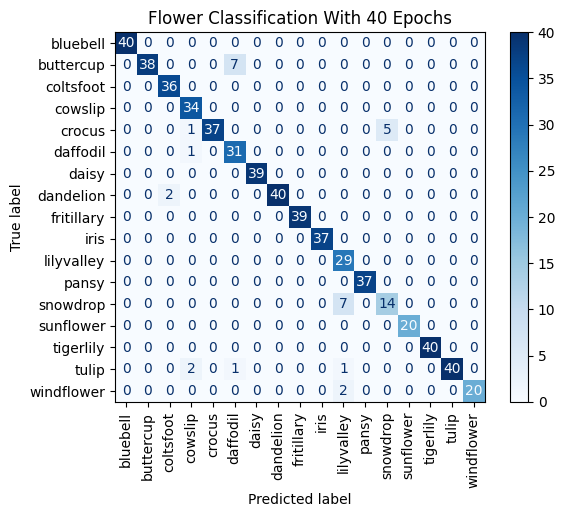

In [50]:
flowers = ['bluebell', 'buttercup', 'coltsfoot', 'cowslip', 'crocus', 'daffodil', 'daisy', 'dandelion',
          'fritillary', 'iris', 'lilyvalley', 'pansy', 'snowdrop', 'sunflower', 'tigerlily', 'tulip', 'windflower']

cm = confusion_matrix(Y_true, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=flowers)

disp.plot(cmap=plt.cm.Blues, xticks_rotation=90)
plt.title(f'Flower Classification With {EPOCHS} Epochs')
plt.show()

# Telegram Bot

In [ ]:
!pip install telebot

In [53]:
import telebot
from telebot.types import Message
from keras.models import Sequential, load_model
import numpy as np
import cv2 as cv

In [54]:
flowers = ['bluebell', 'buttercup', 'coltsfoot', 'cowslip', 'crocus', 'daffodil', 'daisy', 'dandelion',
          'fritillary', 'iris', 'lilyvalley', 'pansy', 'snowdrop', 'sunflower', 'tigerlily', 'tulip', 'windflower']
model: Sequential = load_model(MODEL_PATH_TO_SAVE)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_4 (Dense)             (None, 1024)              25691136  
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                                 
 dense_5 (Dense)             (None, 17)                17425     
                                                                 
Total params: 40423249 (154.20 MB)
Trainable params: 32787985 (125.08 MB)
Non-trainable params: 7635264 (29.13 MB)
_________________________________________________________________


In [ ]:
bot = telebot.TeleBot('token', parse_mode=None)
IS_IMG: bool = False


@bot.message_handler(commands=['start'])
def send_welcome(message: Message):
    bot.reply_to(
        message, f'سلام {message.from_user.first_name} خوبی؟')
    bot.send_message(
        message.chat.id, 'من ربات متنیم. و برای این تمرین داده شدم که ۱۷ تا گل رو از هم تشخیص بدم')


@bot.message_handler(commands=['help'])
def send_help(message: Message):
    bot.send_message(message.chat.id, 'فقط کافیه یک عکس از یک گل برام بفرستی')


@bot.message_handler(commands=['image'])
def get_img(message: Message):
    global IS_IMG
    IS_IMG = True
    bot.send_message(message.chat.id, 'یک عکس از یک گل بفرست')
enumerate

@bot.message_handler(content_types=["photo"])
def photo(message: Message):
    global IS_IMG, model
    if IS_IMG:
        info = bot.get_file(
            message.photo[len(message.photo) - 1].file_id
        )
        user_img = bot.download_file(info.file_path)
        with open('user_flower.jpg', 'wb') as file:
            file.write(user_img)

        user_image = cv.imread('user_flower.jpg')
        user_image = cv.resize(user_image, INPUT_SHAPE[:2])

        prediction = np.argmax(model.predict(np.expand_dims(user_image, axis=0)))

        bot.send_message(
            message.chat.id, f'اسم گلت: {flowers[prediction]}'
        )
        IS_IMG = False

bot.infinity_polling()